In [25]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
#Reading csv
logit2 = pd.DataFrame(pd.read_csv(r'C:\Users\ishan\OneDrive\Desktop\SSDI Project\Infertility.csv'))
logit2.head()

,Age,Weight,Height,PCOS,Junk_Food,Weight_Gain,Regular_Exercise,Fam_Hist_of_Inf,Infertility
0,19,67,161.0,0,1,1,0,1,1
1,20,65,153.0,1,1,1,0,0,0
2,19,49,163.0,0,1,1,0,1,1
3,25,68,163.0,0,1,1,0,0,0
4,40,68,155.0,0,1,1,1,0,1


In [3]:
logit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               216 non-null    int64  
 1   Weight            216 non-null    int64  
 2   Height            216 non-null    float64
 3   PCOS              216 non-null    int64  
 4   Junk_Food         216 non-null    int64  
 5   Weight_Gain       216 non-null    int64  
 6   Regular_Exercise  216 non-null    int64  
 7   Fam_Hist_of_Inf   216 non-null    int64  
 8   Infertility       216 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 15.3 KB


In [4]:
logit2.dropna(inplace = True)

<Axes: >

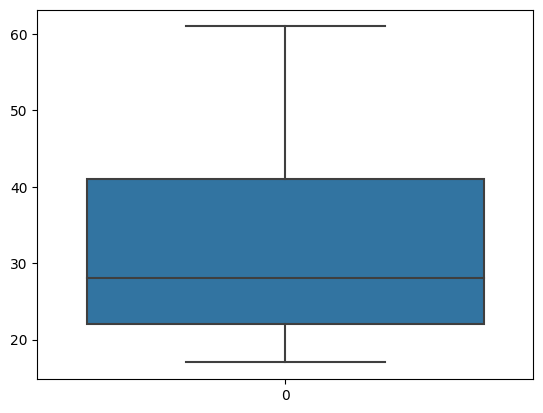

In [6]:
#Handle outliers
q1 = logit2['Age'].quantile(0.25)
q3 = logit2['Age'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
logit2 = logit2[logit2['Age'] <= upper_bound]
sns.boxplot(logit2['Age'])

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(logit2)
print(X)

     const  Age  Weight  Height  PCOS  Junk_Food  Weight_Gain   
0      1.0   19      67  161.00     0          1            1  \
1      1.0   20      65  153.00     1          1            1   
2      1.0   19      49  163.00     0          1            1   
3      1.0   25      68  163.00     0          1            1   
4      1.0   40      68  155.00     0          1            1   
..     ...  ...     ...     ...   ...        ...          ...   
211    1.0   58      71  154.00     0          0            0   
212    1.0   52      54  149.86     0          0            0   
213    1.0   55      85  158.00     0          1            1   
214    1.0   55      84  152.40     0          0            1   
215    1.0   52      69  160.00     0          0            0   

     Regular_Exercise  Fam_Hist_of_Inf  Infertility  
0                   0                1            1  
1                   0                0            0  
2                   0                1            1  
3  

In [9]:
#drop all factor variables which are shown as object in the .info() also drop the y of the given set
X = X.drop(['Junk_Food', 'Weight_Gain', 'Regular_Exercise', 'PCOS', 'Fam_Hist_of_Inf', 'Infertility'], axis=1)
X

,const,Age,Weight,Height
0,1.0,19,67,161.00
1,1.0,20,65,153.00
2,1.0,19,49,163.00
3,1.0,25,68,163.00
4,1.0,40,68,155.00
...,...,...,...,...
211,1.0,58,71,154.00
212,1.0,52,54,149.86
213,1.0,55,85,158.00
214,1.0,55,84,152.40


In [10]:
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_df) 

  feature         VIF
0   const  219.070646
1     Age    1.258557
2  Weight    1.229354
3  Height    1.156974


In [11]:
#scale all quantitative values, that is float64 and int
logit2['Age'] = scale(logit2.Age, with_mean=True, with_std=True) 
logit2['Weight'] = scale(logit2.Weight, with_mean=True, with_std=True)
logit2['Height'] = scale(logit2.Height, with_mean=True, with_std=True) 

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   4., 153.,  58.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  22., 146.,  44.,   4.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   1., 194.,  20.,   0.]]),
 array([-12.92035001, -11.23252018,  -9.54469035,  -7.85686051,
         -6.16903068,  -4.48120084,  -2.79337101,  -1.10554117,
          0.58228866,   2.2701185 ,   3.95794833]),
 <a list of 3 BarContainer objects>)

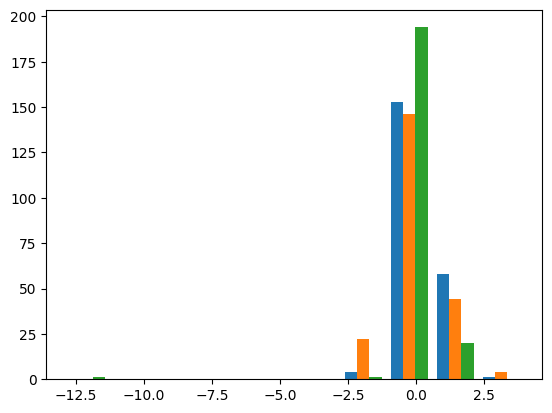

In [12]:
plt.hist(logit2[['Age', 'Weight', 'Height']])

In [14]:
#slicing the dataframe
x = logit2.drop('Infertility', axis = 1)
y = logit2['Infertility']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.5, random_state = 2)

In [21]:
import statsmodels.api as sm
lm1 = sm.Logit(Y_train, X_train).fit()
print(lm1.summary())

Optimization terminated successfully.
         Current function value: 0.673121
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Infertility   No. Observations:                  108
Model:                          Logit   Df Residuals:                      100
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                 0.02672
Time:                        09:14:46   Log-Likelihood:                -72.697
converged:                       True   LL-Null:                       -74.693
Covariance Type:            nonrobust   LLR p-value:                    0.7807
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.3233      0.258      1.253      0.210      -0.182       0.829
Weight     

In [22]:
y_pred = lm1.predict(X_test)
prediction = list(map(round, y_pred))

In [23]:
print('Actual values', list(Y_test.values))
print('Predictions :', prediction)

Actual values [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
Predictions : [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
  
# confusion matrix
cm = confusion_matrix(Y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test, prediction))

Confusion Matrix : 
 [[44 18]
 [22 24]]
Test accuracy =  0.6296296296296297
